# Step responses exemple

(0.0, 360.0)

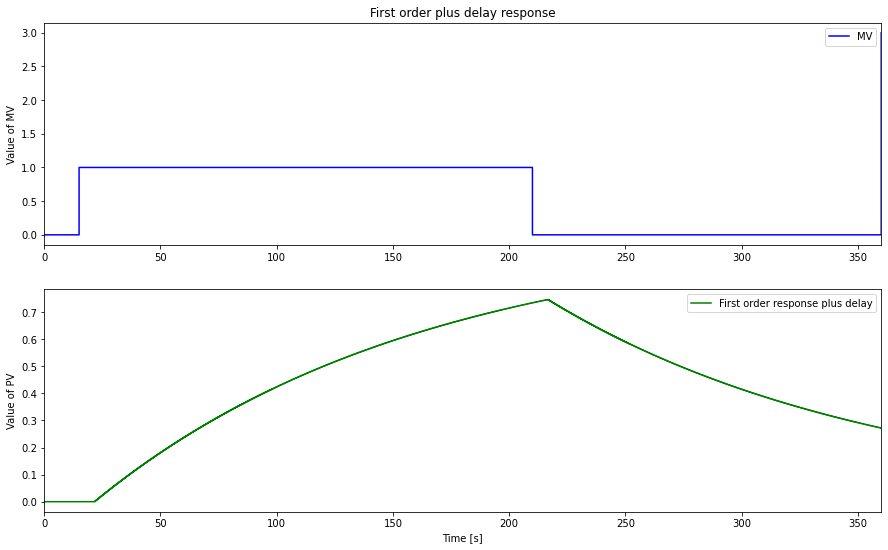

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

#Final SSE Objective: 0.03787173811807361
#K: 0.654997667761135
#T: 141.9367358894029
#theta: 6.678212203596281


TSim = 360
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 15: 1, 210: 0, TSim: 3}

t = []
MV = []

# Parameters
Kp = 0.65499766776113
T = 141.9367358894029
theta = 6.678212203596281

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV = FOPDT(MV,Kp,T,theta,Ts)
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

# Les données pour les graphes

In [15]:
#Final SSE Objective: 0.04819777086011469   C'est les données pour le FO de MV
#K: 0.7243802703300896
#T: 188.2083738101243
#theta: 2.03471691146492


#Final SSE Objective: 0.047635609582858146  C'est les données pour le SO de MV
#K: 0.7234307602222567
#T1: 187.6540651094786
#T2: 1.932656279346386
#theta: 4.094020183851302e-05

#ancienne donnée

# -------------------------------------------------------------------




#Final SSE Objective: 0.019689890027999243  c'est les données pour le FO de DV
#K: 0.5823251622933139
#T: 216.06596903507676
#theta: 16.536071223329817

#Final SSE Objective: 0.015990095303544737  c'est les données pour le SO de DV
#K: 0.5748891859713147
#T1: 207.71400992590017
#T2: 14.85365011964857
#theta: 3.0000002909240173

# Step responses on the real curve for the FO of MV

(0.0, 350.0)

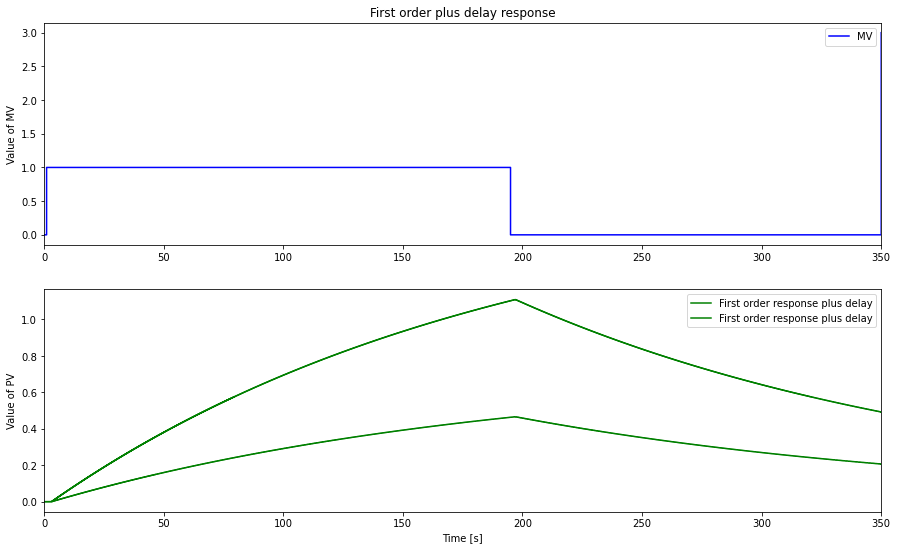

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

#Final SSE Objective: 0.03787173811807361
#K: 0.654997667761135
#T: 141.9367358894029
#theta: 6.678212203596281


TSim = 350
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 1:1 ,195: 0, TSim: 3}

t = []
MV = []



# Parameters
Kp= 0.7243802703300896
T= 188.2083738101243
theta= 2.03471691146492

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV = FOPDT(MV,Kp,T,theta,Ts)
PV2 = FOPDT(MV,Kp+1,T,theta,Ts)
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

plt.subplot(2,1,2)
plt.step(t,PV2,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

 # Bode diagrams of real curves FO of MV

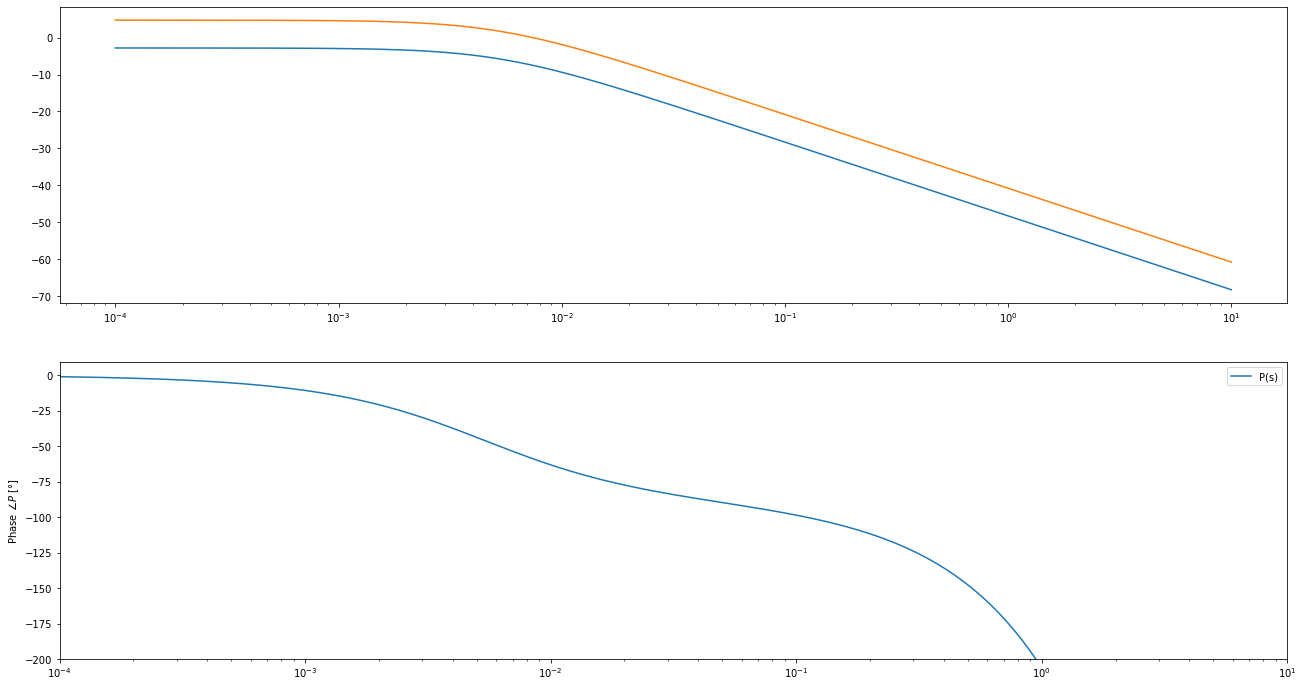

In [44]:
def PlotBode(Kp,Tlag1,theta):

    P = Process({}) # Default process = unit gain
    P2 = Process({}) # Default process = unit gain

    # Parameters for input-output dynamics
    Kp = input("Enter Kp")
    Tlag1 = input()
    
    P.parameters['Kp'] = Kp
    P.parameters['Tlag1'] = Tlag1
    P.parameters['theta'] = theta
    
    P2.parameters['Kp'] = Kp+1
    P2.parameters['Tlag1'] = Tlag1+1
    P2.parameters['theta'] = theta+1

    omega = np.logspace(-4, 1, 10000)

    Ps = Bode(P, omega, Show= False)
    Ps2 = Bode(P2, omega, Show= False)

    fig, (ax_gain, ax_phase) = plt.subplots(2,1)
    fig.set_figheight(12)
    fig.set_figwidth(22)


    ax_gain.semilogx(omega,20*np.log10(np.abs(Ps)),label='P(s)')
    ax_gain.semilogx(omega,20*np.log10(np.abs(Ps2)),label='P(s)')
    ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps)),label='P(s)')
    ax_phase.set_xlim([np.min(omega), np.max(omega)])
    ph_min = np.min((180/np.pi)*np.unwrap(np.angle(Ps))) - 10
    ph_max = np.max((180/np.pi)*np.unwrap(np.angle(Ps))) + 10
    ax_phase.set_ylim([np.max([ph_min, -200]), ph_max])
    ax_phase.set_ylabel(r'Phase $\angle P$ [°]')
    ax_phase.legend(loc='best')



PlotBode(0.7243802703300896,188.2083738101243,2.03471691146492)

In [ ]:
# Step responses on the real curve for the SO of MV

(0.0, 360.0)

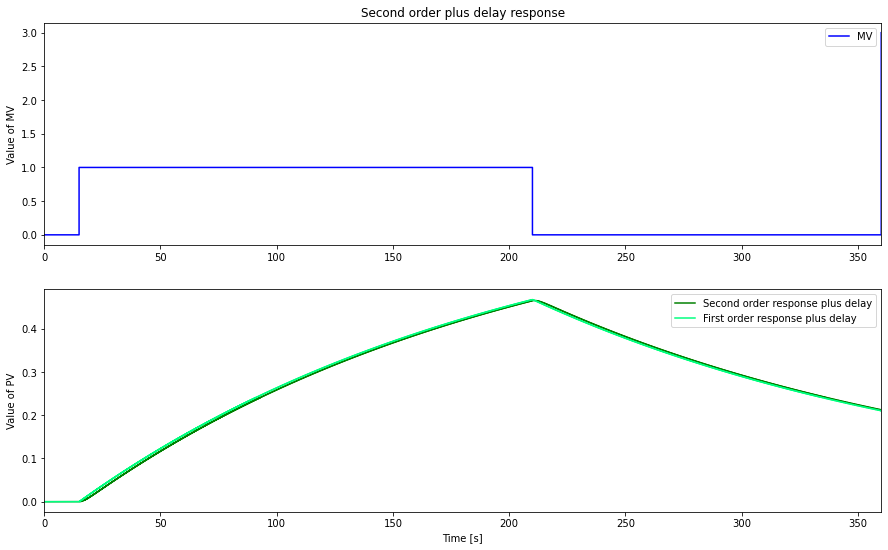

In [51]:
TSim = 360
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 15: 1, 210: 0, TSim: 3}

t = []
MV = []

Kp = 0.7234307602222567
theta = 4.094020183851302e-05
T1 = 187.6540651094786
T2 = 1.932656279346386

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PVFOPDT = FOPDT(MV,Kp,T1,theta,Ts)
PVSOPDT = SOPDT(MV,Kp,T1,T2,theta,Ts)
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Second order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PVSOPDT,'g-',label='Second order response plus delay',where='post')
plt.step(t,PVFOPDT,'springgreen',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

In [45]:
import Tkinter
import tkMessageBox

top = Tkinter.Tk()

def helloCallBack():
   tkMessageBox.showinfo( "Hello Python", "Hello World")

B = Tkinter.Button(top, text ="Hello", command = helloCallBack)

B.pack()
top.mainloop()

ModuleNotFoundError: No module named 'Tkinter'